In [ ]:
import pandas as pd

In [ ]:
!wget  -O 'credit_scoring.csv' -q 'https://www.dropbox.com/scl/fi/5v1ora94vmn46i961ujha/credit_scoring.csv?rlkey=y34fmgqme1e73ca0qbvjpgh9x&dl=0'

Признаки клиентов банка:

- client_id - ID клиента (неотрицательное целое число)
- Age - возраст (вещественный)
- Income - месячный доход (вещественный)
- BalanceToCreditLimit - отношение баланса на кредитной карте к лимту по кредиту (вещественный)
- DIR - Debt-to-income Ratio (вещественный)
- NumLoans - число заемов и кредитных линий
- NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
- Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
- Delinquent90 - Таргет, были ли просрочки выплат по кредиту более 90 дней (бинарный)


In [ ]:
df = pd.read_csv("credit_scoring.csv")
df

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


In [ ]:
X = df.drop(['Delinquent90'], axis=1)
y = df['Delinquent90']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 5.7 MB


## 1 Решающие деревья и случайный лес

1.1 Обучите дерево решений максимальной глубины 3. Перед этим может понадобиться предобработать данные (пропуски). Также разделите данные на обучающие и тестовые (не забывайте, что обработка данных для теста и трейна должна происходить отдельно)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9351333333333334


1.2 Визуализируйте решающее дерево

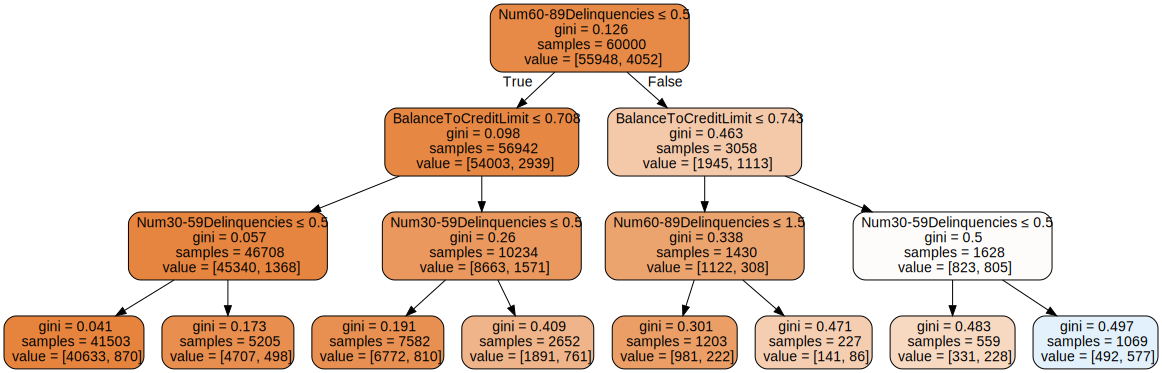

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_classifier, out_file=None, feature_names=X_train.columns, proportion = False, filled=True, rounded=True, \
                           special_characters = True)

graph = graphviz.Source(dot_data)
graph

1.3 Рассмотрите, как изменение глубины дерева влияет на качество модели. Обучите решающее дерево с различной глубиной (от 1 до 11), оцените его точность и определите, когда начинается переобучение и какая глубина дерева является оптимальной





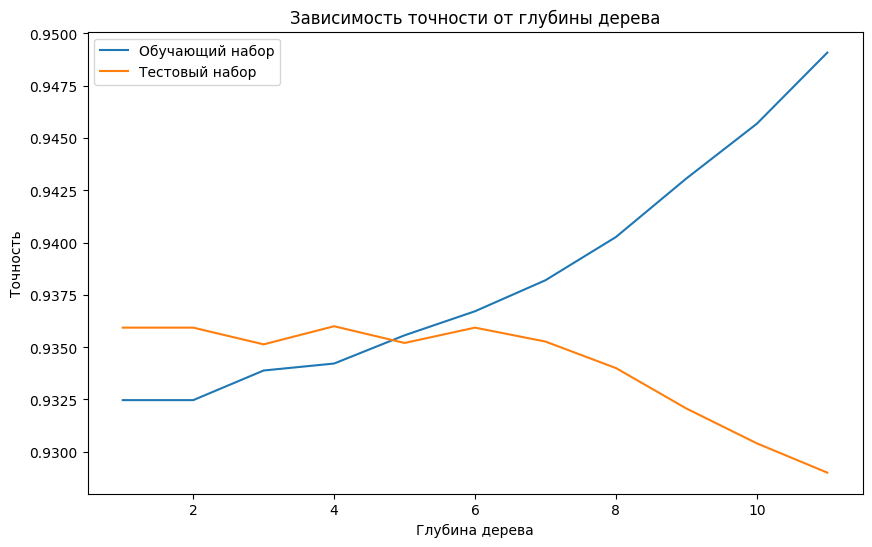

In [ ]:
train_accuracy = []
test_accuracy = []

depths = range(1, 12)

for depth in depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    tree_model.fit(X_train, y_train)

    train_pred = tree_model.predict(X_train)
    test_pred = tree_model.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracy, label='Обучающий набор')
plt.plot(depths, test_accuracy, label='Тестовый набор')
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.title('Зависимость точности от глубины дерева')
plt.legend()
plt.show()

Глубина 4-5 лучше всего

1.4 Настройте параметры дерева с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Определим параметры, которые мы хотим настроить
param_grid = {
    'max_depth': range(1, 6),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 6)
}

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Лучшие параметры:", grid_search.best_params_)
print("Среднее качество на 5-кратной кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Среднее качество на 5-кратной кросс-валидации: 0.9337833333333332


1.5 Визуализируйте лучшее решающее дерево


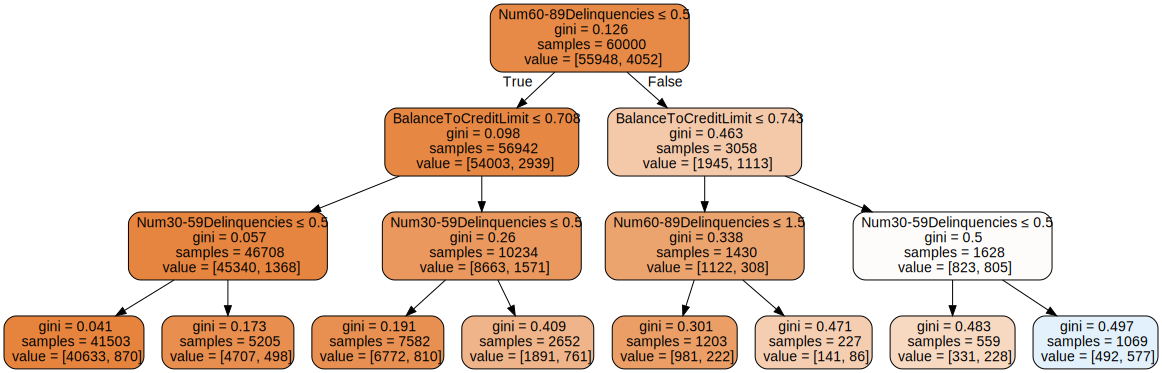

In [ ]:
best_params = grid_search.best_params_

best_tree = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'])
best_tree.fit(X, y)

dot_data = export_graphviz(tree_classifier, out_file=None, feature_names=X_train.columns, proportion = False, filled=True, rounded=True, \
                           special_characters = True)


graph = graphviz.Source(dot_data)
graph

1.6 Обучите Случайный лес (RandomForestClassifier), Настройте гиперпараметры случайного леса с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации. Не забывайте про распараллеливание (n_jobs=-1).



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Лучшие параметры для случайного леса:", grid_search_rf.best_params_)
print("Среднее качество на 5-кратной кросс-валидации:", grid_search_rf.best_score_)

Лучшие параметры для случайного леса: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Среднее качество на 5-кратной кросс-валидации: 0.9348833333333333


1.7 Посмотрите, как настроенный случайный лес оценивает важность признаков по их влиянию на целевой признак. Представьте результаты в наглядном виде с помощью DataFrame.



                 Feature  Importance
9   BalanceToCreditLimit    0.317396
7  Num60-89Delinquencies    0.259142
6  Num30-59Delinquencies    0.216923
2                    Age    0.050209
3               NumLoans    0.036668
1                    DIR    0.034574
8                 Income    0.034314
0              client_id    0.025896
4     NumRealEstateLoans    0.015127
5          NumDependents    0.009750


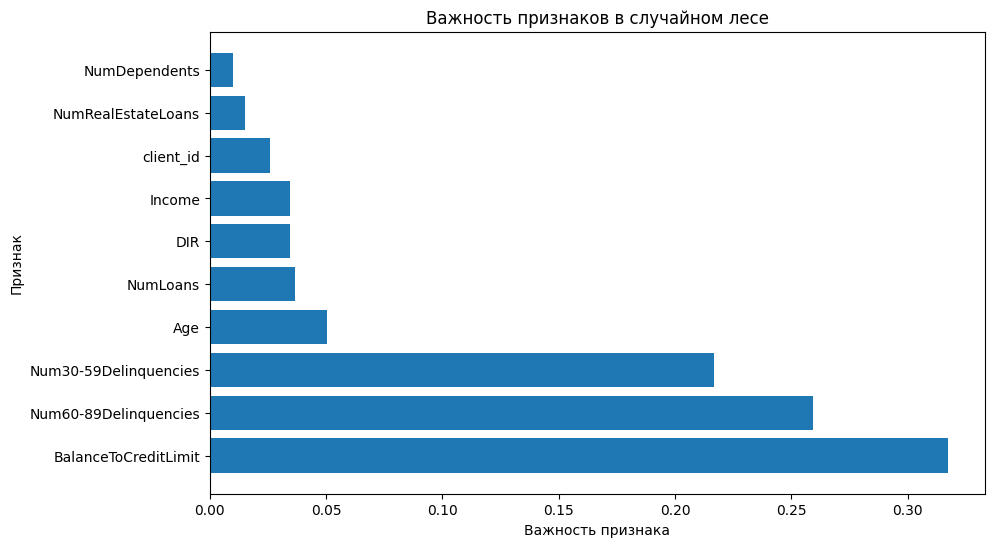

In [ ]:
best_params = grid_search_rf.best_params_

rf_classifier = RandomForestClassifier(**best_params)
rf_classifier.fit(X_train, y_train)

feature_importance = rf_classifier.feature_importances_

# Создадим DataFrame для отображения результатов
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Отсортируем по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в случайном лесе')
plt.show()

1.9 Выберите метрику и объясните ваш выбор метрики и сравните результаты решающего дерева и случайного леса

---



In [ ]:
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=2)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

random_forest = RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
random_forest.fit(X_train, y_train,)
rf_pred = random_forest.predict(X_test)

print('Метрики для решающего дерева:\n')
print(classification_report(y_test, dt_pred, target_names=['class 0', 'class 1']))
print('='*53, '\n')
print('Метрики для случайного леса:\n')
print(classification_report(y_test, rf_pred, target_names=['class 0', 'class 1']))

Метрики для решающего дерева:

              precision    recall  f1-score   support

     class 0       0.94      0.99      0.97     14039
     class 1       0.48      0.16      0.24       961

    accuracy                           0.94     15000
   macro avg       0.71      0.57      0.60     15000
weighted avg       0.92      0.94      0.92     15000


Метрики для случайного леса:

              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97     14039
     class 1       0.55      0.08      0.13       961

    accuracy                           0.94     15000
   macro avg       0.75      0.54      0.55     15000
weighted avg       0.92      0.94      0.91     15000



# 2 Бустинг xgboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
!wget  -O 'telecom_churn.csv' -q 'https://www.dropbox.com/scl/fi/t8ickc6qfwdtfx6v40crd/telecom_churn.csv?rlkey=i7slagusqlb9pvsqdzvwac0x1&dl=0'

In [ ]:
df_telecom = pd.read_csv("telecom_churn.csv")
df_telecom

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


2.1 XGBoost поддерживает только числовые признаки. Поэтому текстовые признаки требуют предобработки

Штаты можно просто занумеровать, а признаки International plan (наличие международного роуминга), Voice mail plan (наличие голосовой почтыы) и целевой Churn сделать бинарными.




In [ ]:
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = df_telecom.select_dtypes(exclude=[np.number]).columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df_telecom[column] = label_encoder.fit_transform(df_telecom[column])
df_telecom

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


2.2 Разделим данные на обучающую и тестовую выборки в отношении 7:3.

In [ ]:
X1 = df_telecom.drop('Churn', axis=1)
y1 = df_telecom['Churn']


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

print("Размерности обучающей выборки:", X_train.shape, y_train.shape)
print("Размерности тестовой выборки:", X_test.shape, y_test.shape)

Размерности обучающей выборки: (2333, 19) (2333,)
Размерности тестовой выборки: (1000, 19) (1000,)


2.3 Инициализируете параметры и обучите классификатор xgboost

In [ ]:
params = {
    'objective': 'binary:logistic',  # бинарная классификация
    'max_depth': 3,  # глубина дерева
    'learning_rate': 0.1,  # скорость обучения
    'subsample': 0.8,  # доля случайных выборок для построения каждого дерева
    'colsample_bytree': 0.8,  # доля признаков для построения каждого дерева
    'seed': 42  # фиксация случайности для воспроизводимости результатов
}

clf = XGBClassifier(**params)
clf.fit(X_train1, y_train1)

y_pred1 = clf.predict(X_test1)

accuracy = (y_pred1 == y_test1).mean()
print(f"Точность классификатора на тестовой выборке: {accuracy:.4f}")

Точность классификатора на тестовой выборке: 0.9530


2.4 Получите прогнозы для тестовой выборки и посчитайте долю правильных ответов алгоритма на тестовой выборке.

In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)

print(f"Точность классификатора на тестовой выборке: {accuracy:.4f}")

Точность классификатора на тестовой выборке: 0.9530


2.5 Важность признаков
Вычислите F score (не F мера!) для оценки важности признаков в Xgboost.

                   Feature   F-score
18  Customer service calls  0.126882
3       International plan  0.118099
4          Voice mail plan  0.100812
6        Total day minutes  0.098667
8         Total day charge  0.088274
17       Total intl charge  0.083021
16        Total intl calls  0.064403
15      Total intl minutes  0.057624
9        Total eve minutes  0.051835
12     Total night minutes  0.029000
11        Total eve charge  0.027080
5    Number vmail messages  0.023447
13       Total night calls  0.023388
2                Area code  0.020661
0                    State  0.019877
10         Total eve calls  0.017611
7          Total day calls  0.017297
1           Account length  0.016145
14      Total night charge  0.015878


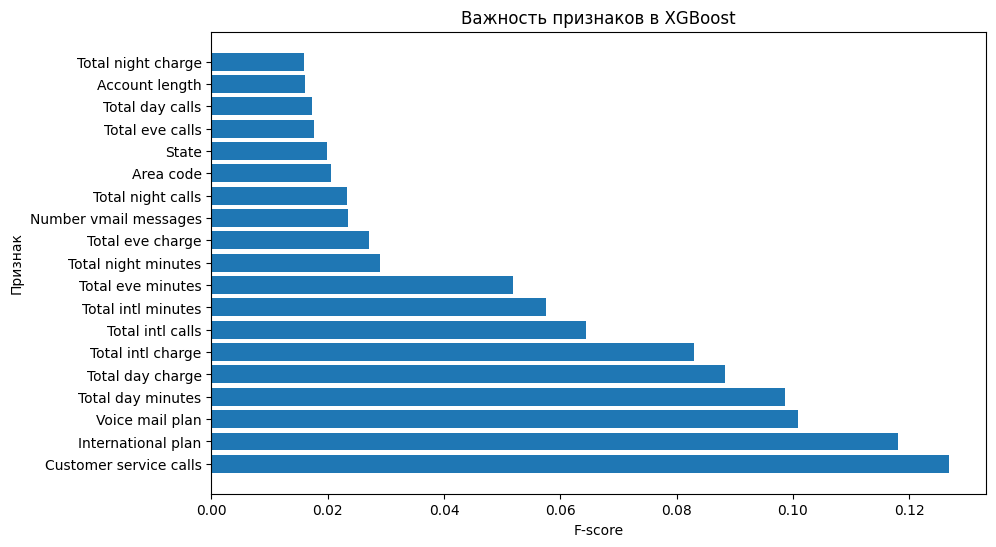

In [ ]:
feature_importance = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'F-score': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='F-score', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['F-score'])
plt.xlabel('F-score')
plt.ylabel('Признак')
plt.title('Важность признаков в XGBoost')
plt.show()